## Importing packages

In [1]:
#install.packages("here")
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','data_cleaning.R'))
source(here('Modules','unsupervised_learning.R'))
#install_all_packages()
load_library_packages()

Warning message:
"package 'here' was built under R version 4.1.1"
here() starts at C:/Users/maria/Desktop/Programacao/IC/projetos/Barreiras-e-Facilitadores

Warning message:
"package 'ggplot2' was built under R version 4.1.1"
Warning message:
"package 'cowplot' was built under R version 4.1.1"
Warning message:
"package 'randomForest' was built under R version 4.1.1"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Warning message:
"package 'caret' was built under R version 4.1.1"
Carregando pacotes exigidos: lattice

Warning message:
"package 'lattice' was built under R version 4.1.1"
Warning message:
"package 'rpart.plot' was built under R version 4.1.1"
Carregando pacotes exigidos: rpart

Warning message:
"package 'readxl' was built under R version 4.1.2"
Warning message:
"package 'e1071' was built under R version 4.1.1"
Warning message:
"package 'Augmen

Performing PCA
Read the 1242 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 100.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 2.39 seconds (sparsity = 0.326346)!
Learning embedding...
Iteration 50: error is 57.596822 (50 iterations in 2.82 seconds)
Iteration 100: error is 57.596822 (50 iterations in 2.95 seconds)
Iteration 150: error is 57.596822 (50 iterations in 3.33 seconds)
Iteration 200: error is 57.596822 (50 iterations in 6.17 seconds)
Iteration 250: error is 57.596830 (50 iterations in 7.05 seconds)
Iteration 300: error is 2.314829 (50 iterations in 6.89 seconds)
Iteration 350: error is 1.308008 (50 iterations in 5.45 seconds)
Iteration 400: error is 1.263160 (50 iterations in 5.24 seconds)
Iteration 450: error is 1.258562 (50 iterations in 4.86 seconds)
Iteration 500: error is 1.254343 (50 iterations in 5.77 seconds)
Iteration 550: error is 1.251567 (50 iterations in 6.70 seconds)
Iteration 6

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE

[[28]]
[1] TRUE

[[29]]
[1] TRUE

[[30]]
[1] TRUE

[[31]]
[1] TRUE

## Outliers

In [2]:
table(sedentary_behavior_dataset[, "sedentary_behavior"])
sedentary_before <- c("still_sedentary", "change_to_not_sedentary")
active_before <- c("still_not_sedentary", "change_to_sedentary")
sedentary_behavior_dataset_1 <- sedentary_behavior_dataset[sedentary_behavior_dataset$sedentary_behavior %in% active_before, ]

new_levels <- droplevels(sedentary_behavior_dataset_1[, "sedentary_behavior"], exclude = levels(sedentary_behavior_dataset_1[, "sedentary_behavior"]) %in% sedentary_before)
sedentary_behavior_dataset_1[, "sedentary_behavior"] <- new_levels

table(sedentary_behavior_dataset_1[, "sedentary_behavior"])


change_to_not_sedentary     change_to_sedentary     still_not_sedentary 
                     25                     330                     780 
        still_sedentary 
                    107 


change_to_sedentary still_not_sedentary 
                330                 780 

### Outlier: Strange Dont Practice

In [3]:
sedentary_behavior_dataset_copy <- sedentary_behavior_dataset_1
sedentary_behavior_dataset_copy["outlier"] <- strange_dp[as.numeric(rownames(sedentary_behavior_dataset_1))]
outliers_result_dp <- outliers_checker(distances_sdp, sedentary_behavior_dataset_copy, "sedentary_behavior")

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting leve

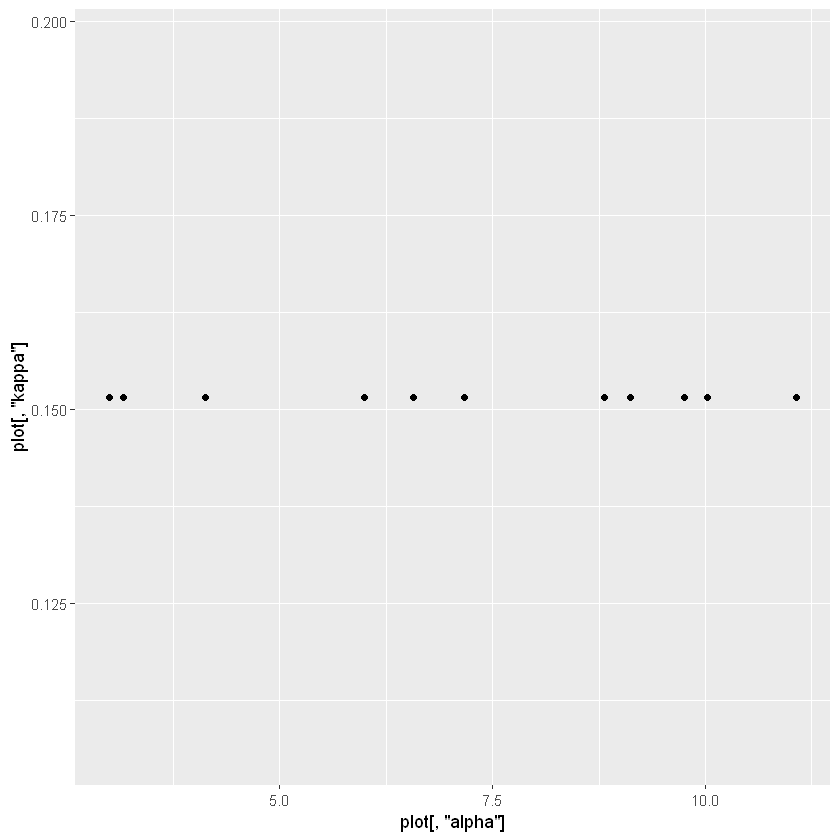

In [11]:
plot <- outliers_result_dp$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

#### Outlier: Strange Practice

In [13]:
sedentary_behavior_dataset_copy <- sedentary_behavior_dataset_1
sedentary_behavior_dataset_copy["outlier"] <- strange_p[as.numeric(rownames(sedentary_behavior_dataset_1))]
outliers_result_sp <- outliers_checker(distances_sp, sedentary_behavior_dataset_copy, "sedentary_behavior")

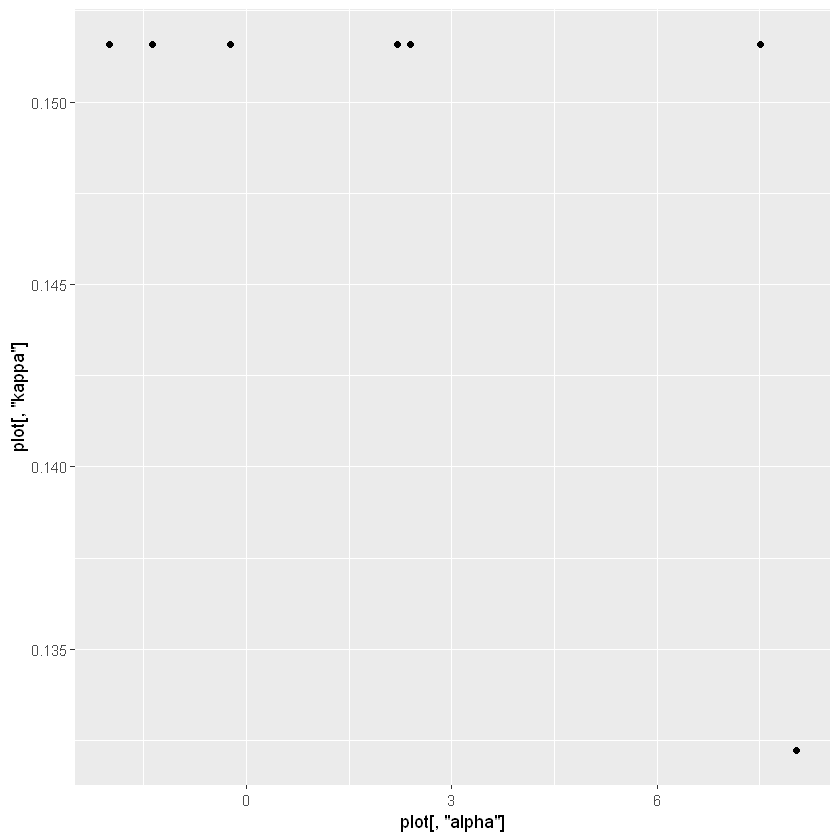

In [14]:
plot <- outliers_result_sp$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

#### New Train and Test
The outliers check in the strange dont practice showed that there is no need to delete records

In [4]:
sed_behavior_train <- outliers_result_dp$best_model$train
sed_behavior_test <- outliers_result_dp$best_model$test

## Models for not Sedentary Before

In [17]:
dim(sedentary_behavior_dataset_1)
table(sedentary_behavior_dataset_1[, "sedentary_behavior"])

[1] 1110   73


change_to_sedentary still_not_sedentary 
                330                 780 

There is a majority class, we should apply data augmentation. We chose kappa metrict to optimize becouse data is unbalanced.

### Applying augmentation into the training set: sedentary before

In [20]:
sed_behavior_train.aug <- data_augmentation(
    train_data=sed_behavior_train,
    yname="sedentary_behavior",
    maj_class = "still_not_sedentary",
    min_classes = c("change_to_sedentary"),
    ycol=match("sedentary_behavior",names(sedentary_behavior_dataset_1))
)

table(sed_behavior_train.aug[, "sedentary_behavior"])



change_to_sedentary still_not_sedentary 
                546                 546 

### Kappa metric without augmentation: not Sedentary Before

Confusion Matrix and Statistics

                     Reference
Prediction            change_to_sedentary still_not_sedentary
  change_to_sedentary                  18                  14
  still_not_sedentary                  81                 220
                                             
               Accuracy : 0.7147             
                 95% CI : (0.6629, 0.7626)   
    No Information Rate : 0.7027             
    P-Value [Acc > NIR] : 0.3399             
                                             
                  Kappa : 0.1516             
                                             
 Mcnemar's Test P-Value : 1.275e-11          
                                             
            Sensitivity : 0.18182            
            Specificity : 0.94017            
         Pos Pred Value : 0.56250            
         Neg Pred Value : 0.73090            
              Precision : 0.56250            
                 Recall : 0.18182            
              

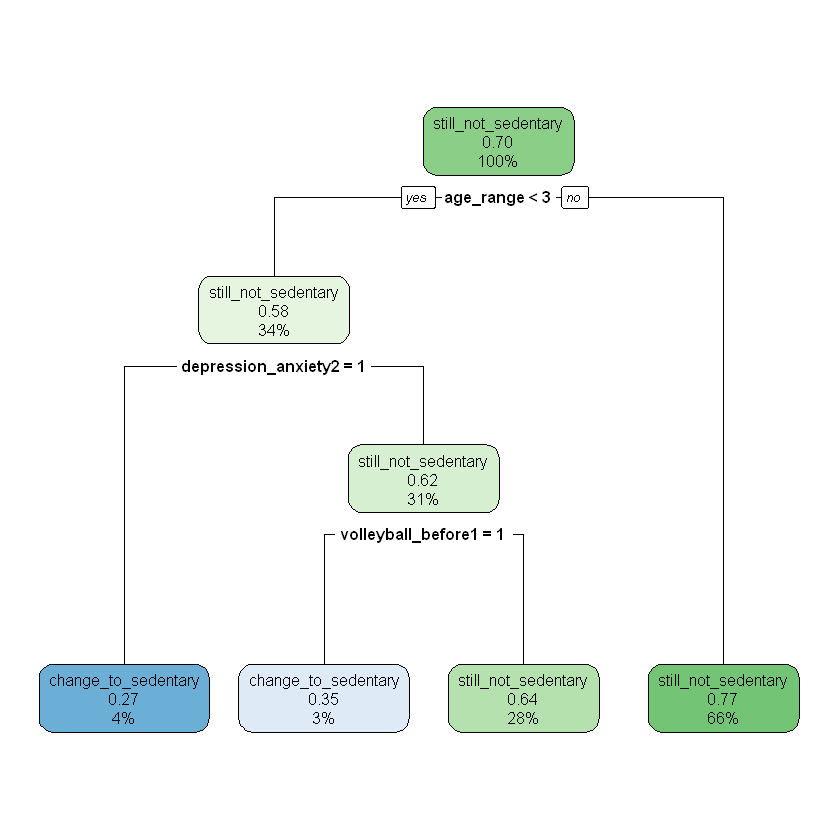

In [21]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = sed_behavior_train,
    test_data=sed_behavior_test,
    yname="sedentary_behavior",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel)



### Accuracy metric with augmentation: not Sedentary Before

Confusion Matrix and Statistics

                     Reference
Prediction            change_to_sedentary still_not_sedentary
  change_to_sedentary                   3                  11
  still_not_sedentary                  96                 223
                                             
               Accuracy : 0.6787             
                 95% CI : (0.6256, 0.7285)   
    No Information Rate : 0.7027             
    P-Value [Acc > NIR] : 0.8459             
                                             
                  Kappa : -0.0222            
                                             
 Mcnemar's Test P-Value : 4.639e-16          
                                             
            Sensitivity : 0.030303           
            Specificity : 0.952991           
         Pos Pred Value : 0.214286           
         Neg Pred Value : 0.699060           
              Precision : 0.214286           
                 Recall : 0.030303           
              

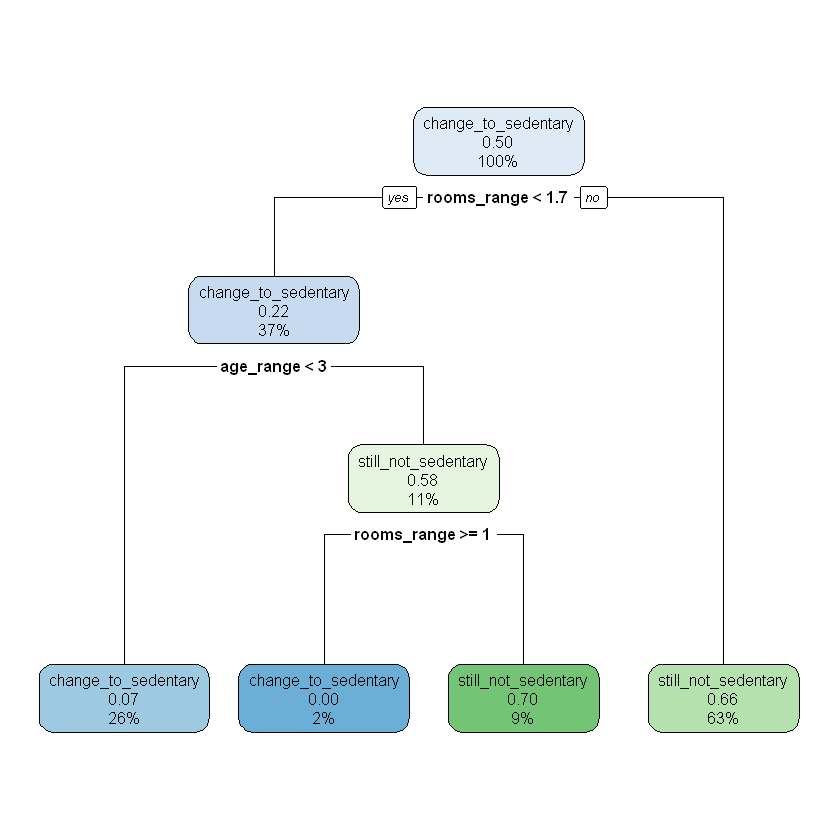

In [22]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = sed_behavior_train.aug,
    test_data=sed_behavior_test,
    yname="sedentary_behavior",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel)



### RF practice before: Kappa metric without augmentation

In [23]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = sed_behavior_train,
    test_data=sed_behavior_test,
    yname="sedentary_behavior",
    length = 15
)
print(model$matrix)

Confusion Matrix and Statistics

                     Reference
Prediction            change_to_sedentary still_not_sedentary
  change_to_sedentary                  34                  27
  still_not_sedentary                  65                 207
                                             
               Accuracy : 0.7237             
                 95% CI : (0.6723, 0.7711)   
    No Information Rate : 0.7027             
    P-Value [Acc > NIR] : 0.2188553          
                                             
                  Kappa : 0.2564             
                                             
 Mcnemar's Test P-Value : 0.0001145          
                                             
            Sensitivity : 0.3434             
            Specificity : 0.8846             
         Pos Pred Value : 0.5574             
         Neg Pred Value : 0.7610             
              Precision : 0.5574             
                 Recall : 0.3434             
              

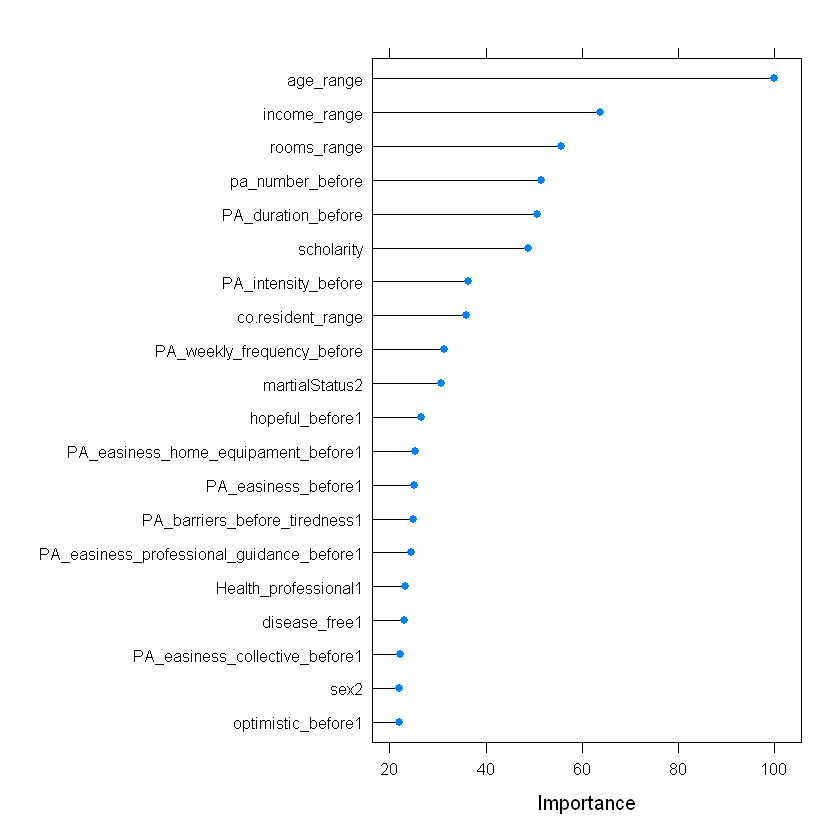

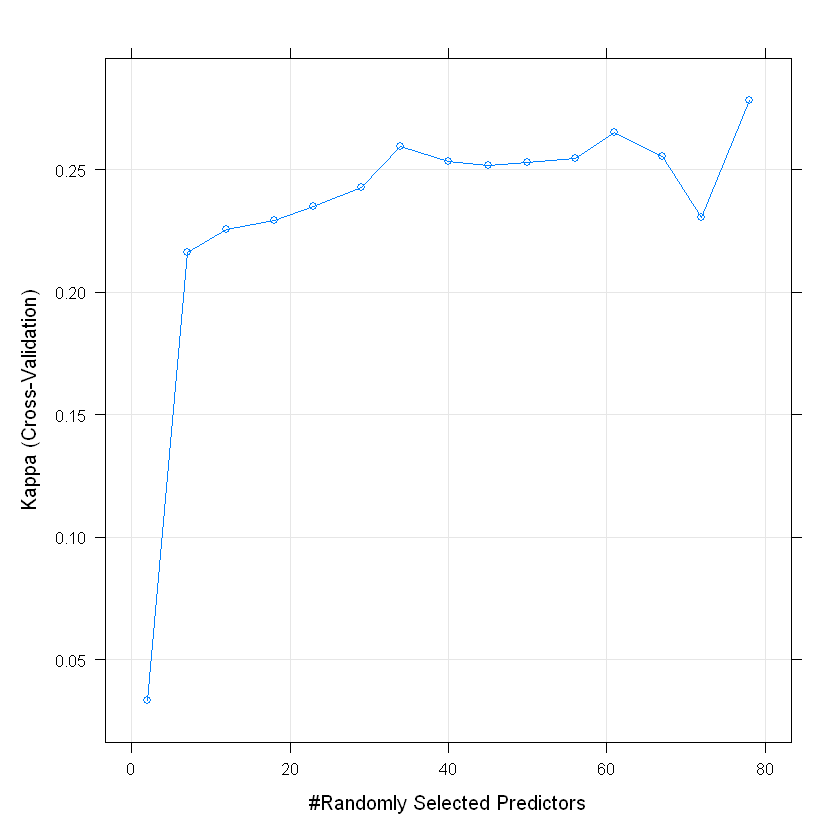

In [24]:
plot(varImp(model$result), top=20)
plot(model$result)


### RF practice before: Accuracy metric with augmentation

In [25]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Accuracy",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = sed_behavior_train.aug,
    test_data=sed_behavior_test,
    yname="sedentary_behavior",
    length = 15
)
print(model$matrix)

Confusion Matrix and Statistics

                     Reference
Prediction            change_to_sedentary still_not_sedentary
  change_to_sedentary                  22                   6
  still_not_sedentary                  77                 228
                                             
               Accuracy : 0.7508             
                 95% CI : (0.7007, 0.7963)   
    No Information Rate : 0.7027             
    P-Value [Acc > NIR] : 0.03002            
                                             
                  Kappa : 0.2479             
                                             
 Mcnemar's Test P-Value : 1.548e-14          
                                             
            Sensitivity : 0.22222            
            Specificity : 0.97436            
         Pos Pred Value : 0.78571            
         Neg Pred Value : 0.74754            
              Precision : 0.78571            
                 Recall : 0.22222            
              

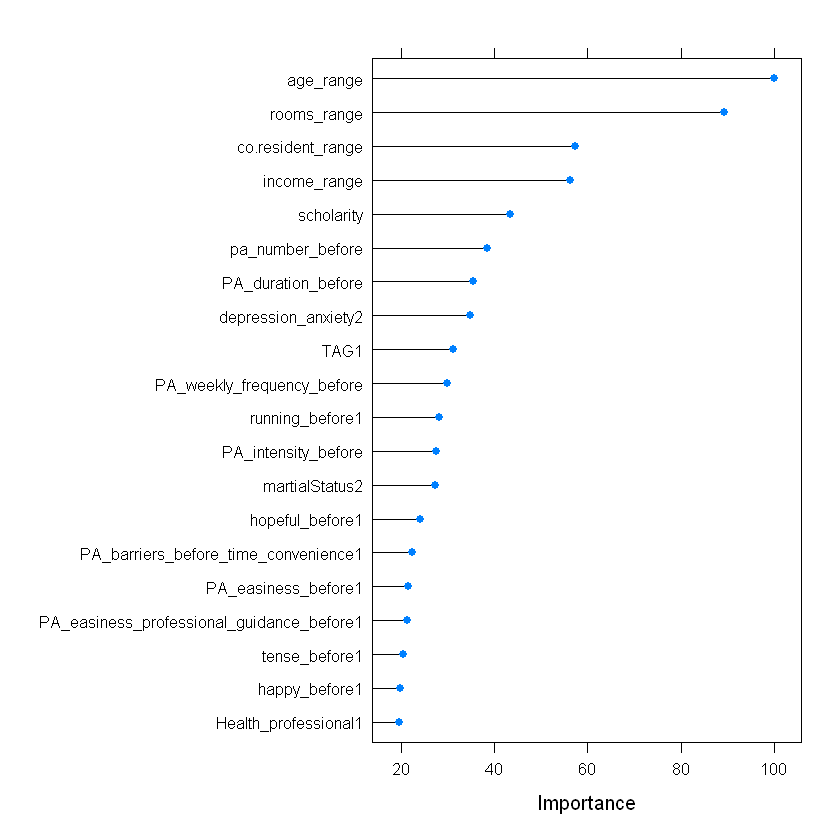

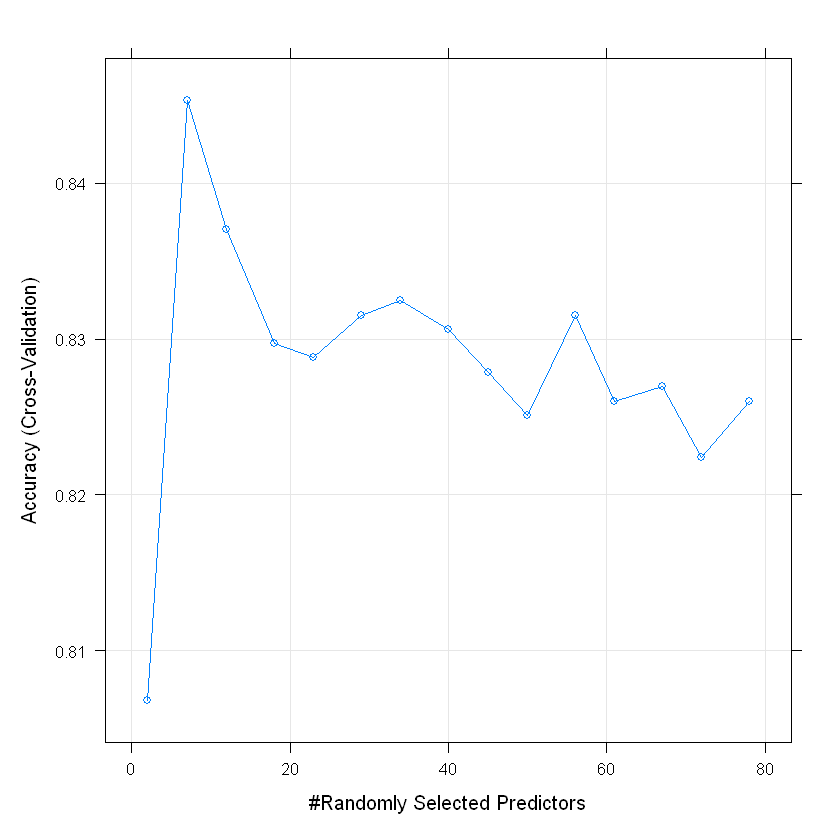

In [26]:
plot(varImp(model$result), top=20)
plot(model$result)


## Sensibility and Specificity Analysis

### Vectorized Metrics

In [5]:
f1 <- function(ths){
    
  diff <- abs(ths$Sensitivity - ths$Specificity)
  indexOfMin = match(min(diff), diff)
  return(ths[indexOfMin, "prob_threshold"])
}

f2 <- function(ths){
    desv <- function(x){
      sd(c(unname(x["Sensitivity"]), unname(x["Specificity"])))
    }
    avg <- (ths$Sensitivity + ths$Specificity)/2
    deviation <- apply(ths, desv, MARGIN=1)
    metric <- avg - deviation
    indexOfMin = match(max(metric), metric)
    return(ths[indexOfMin, "prob_threshold"])
}

#### Find Optimal threshhold

Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'F1'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'F1'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'F1'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Pos Pred Value', 'Precision', 'F1'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Pos Pred Value', 'Precision', 'F1'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Pos Pred Value', 'Precision', 'F1'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Pos Pred Value', 'Precision', 'F1'.
"
Warning message in .fun(piece, ...):
"The f

[1] 0.32
Confusion Matrix and Statistics

                     Reference
Prediction            change_to_sedentary still_not_sedentary
  change_to_sedentary                  64                  89
  still_not_sedentary                  35                 145
                                             
               Accuracy : 0.6276             
                 95% CI : (0.5733, 0.6797)   
    No Information Rate : 0.7027             
    P-Value [Acc > NIR] : 0.9986             
                                             
                  Kappa : 0.2299             
                                             
 Mcnemar's Test P-Value : 1.94e-06           
                                             
            Sensitivity : 0.6465             
            Specificity : 0.6197             
         Pos Pred Value : 0.4183             
         Neg Pred Value : 0.8056             
              Precision : 0.4183             
                 Recall : 0.6465             
     

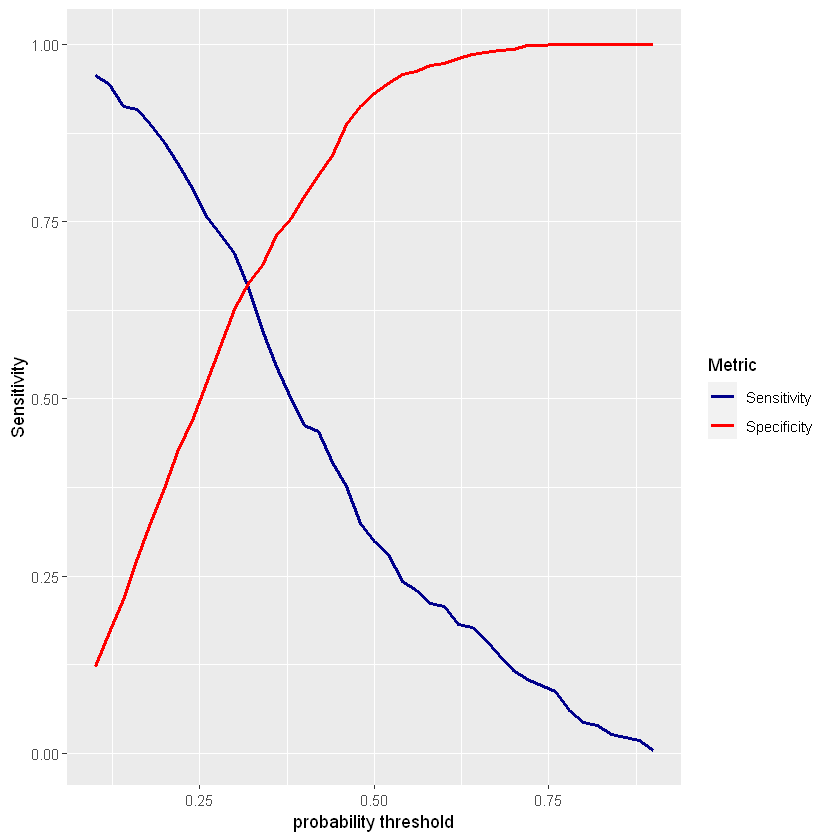

In [6]:
source(here('Modules','modules.R'))
set.seed(2)
model <- fit_model_thresholder(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid",  classProbs=TRUE, savePredictions=TRUE),
    train_data = sed_behavior_train,
    test_data=sed_behavior_test,
    yname="sedentary_behavior",
    length = 15,
    best_th = f2
)

print(model$matrix)